In [1]:
import pandas as pd 
import seaborn as sbn
import numpy as np
import powerlaw as pwl
import pickle as pkl
import matplotlib.pyplot as plt

# get the data

In [2]:
main_path=r'/home/wangjianying/data/Spatial_Yule/change_rate_without_m'

In [5]:
def get_paths(main_path):
    import os 
    parts=os.listdir(main_path)
    out_paths=[main_path+'/'+str(r)+'_1000000.pkl' for r in [2]]
    return out_paths
def get_valuelist(path):
    with open(path,'rb+') as file:
        values=pkl.load(file=file)
        time_values=[item[0] for item in values]
        step_values=[item[1] for item in values]
        step_values2=[]
        for item in step_values:
            step_values2.extend(item)
        time_values2=[]
        for item in time_values:
            time_values2.extend(item)
    return step_values2,time_values2

# get the data and ift by powerlaw

/home/wangjianying/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/wangjianying/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


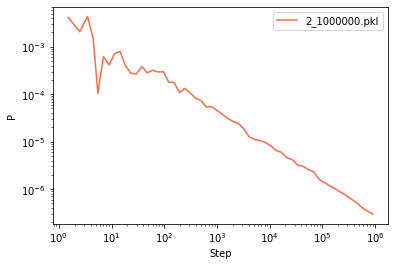

In [6]:
paths=get_paths(main_path=main_path)
palette = sbn.color_palette("Reds", len(paths))
values=[]
for index,path in enumerate(paths):
    c=palette[index]
    step_values,time_values=get_valuelist(path)
    label=path.split('/')[-1]
    fit=pwl.Fit(step_values,xmin=1,discrete=True)
    fit.plot_pdf(label=label,original_data=True,c=c)
    plt.xlabel('Step')
    plt.ylabel('P')
    plt.legend()